In [39]:
import yfinance as yf

def get_data(symbol: str):
    datos = yf.download(tickers=symbol, period='6mo', interval='1d')
    datos.reset_index(inplace=True, drop=True)
    return datos
# Get the data
datos = get_data('NVDA')

[*********************100%%**********************]  1 of 1 completed


In [40]:

import pandas_ta as ta

# Definir una función para calcular la media móvil simple (SMA) de una serie de datos
def calculo_sma(datos, length: int):
    # Calcular la SMA de la columna 'Close' del DataFrame, con una longitud dada
    return ta.sma(datos["Close"], length)

# Calcular la SMA de 20 periodos y añadirla como una nueva columna al DataFrame
datos["sma_20"] = calculo_sma(datos, 20)
# Eliminar filas con valores NaN resultantes de la SMA
datos.dropna(inplace=True)

In [41]:
import numpy as np
# Definir una función para calcular la pendiente de una serie de datos
def calculo_pendiente(series, period: int = 5):
    # Inicializar una lista para almacenar los valores de la pendiente
    pendiente = [0 for _ in range(period-1)]
    # Iterar sobre la serie de datos para calcular la pendiente
    for i in range(period - 1, len(series)):
        # Crear un arreglo de índices para el período actual
        x = np.arange(period)
        # Obtener los valores de la serie para el período actual
        y = series[i-period+1:i+1].values
        # Calcular la pendiente usando regresión lineal y obtener el primer coeficiente
        m = np.polyfit(x, y, 1)[0]
        # Convertir la pendiente a porcentaje respecto al primer valor del período
        porcentaje_pendiente = (m / y[0]) * 100
        # Añadir el porcentaje de pendiente a la lista de pendientes
        pendiente.append(porcentaje_pendiente)
        
    # Retornar la lista de pendientes
    return pendiente

In [42]:
# Calcular la pendiente de la SMA de 20 periodos y añadirla como una nueva columna al DataFrame
datos["pendiente"] = calculo_pendiente(datos["sma_20"])
# Reiniciar el índice del DataFrame, eliminando el índice anterior
datos.reset_index(inplace=True, drop=True)

In [45]:
datos [ 10:100]

,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente
10,80.790001,82.393997,77.570000,78.817001,78.806824,829388000,69.211900,0.963035
11,79.699997,80.646004,78.504997,79.092003,79.081802,503973000,70.114951,1.150654
12,79.380997,79.480003,77.162003,78.700996,78.690842,391705000,70.926750,1.278701
13,77.620003,78.932999,77.125000,77.663002,77.652985,393110000,71.671201,1.222124
14,79.094002,79.989998,78.349998,79.112000,79.101791,507289000,72.550451,1.189586
...,...,...,...,...,...,...,...,...
95,126.129997,128.119995,122.599998,126.400002,126.400002,362975900,122.731050,0.799614
96,124.099998,126.410004,122.919998,123.989998,123.989998,252571700,123.189300,0.595102
97,124.580002,127.709999,122.750000,123.540001,123.540001,315516700,123.841300,0.537932
98,123.470001,124.839996,118.830002,124.300003,124.300003,284885500,124.574650,0.495254


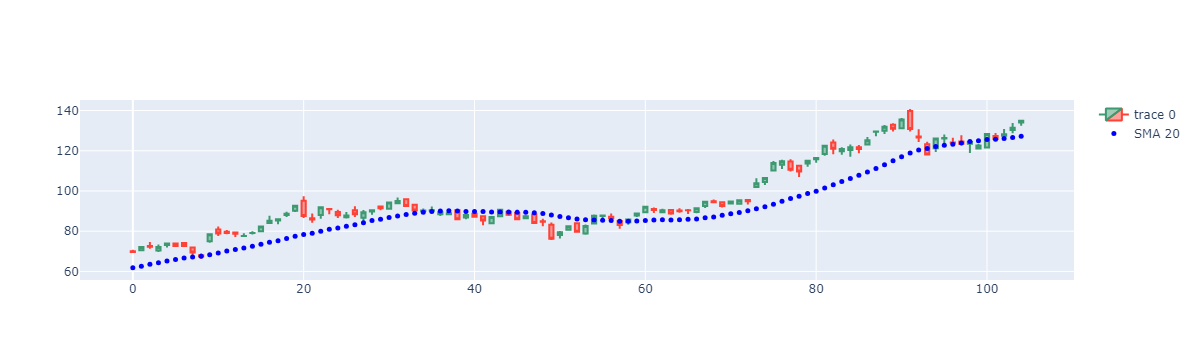

In [46]:
# Importar la librería plotly.graph_objects como go para la visualización de datos
import plotly.graph_objects as go

# Crear una copia del DataFrame 'datos' para trabajar con ella
dfplt = datos[:]

# Crear una figura utilizando plotly, específicamente un gráfico de velas (Candlestick)
# Esto es útil para visualizar movimientos de precios en datos financieros
figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],  # Precios de apertura
                                        high=datos["High"],  # Precios máximos
                                        low=datos["Low"],    # Precios mínimos
                                        close=datos["Close"] # Precios de cierre
                                       )])

# Añadir a la figura un gráfico de dispersión para la SMA de 20 periodos
# Esto se hace para visualizar cómo se compara la SMA con los precios reales
figura.add_scatter(x=dfplt.index, y=dfplt["sma_20"], mode='markers', 
                   marker=dict(color='blue', size=5), name='SMA 20')

# Actualizar la configuración de la figura para ocultar el control deslizante del eje X
# Esto mejora la visualización al no sobrecargar la interfaz con controles innecesarios
figura.update_layout(xaxis_rangeslider_visible=False)

# Mostrar la figura. Esto generará el gráfico en el entorno de Jupyter Notebook o en una ventana de navegador web
figura.show()

In [56]:
datos['SMA_10'] = calculo_sma(datos,10)
datos['SMA_20'] = calculo_sma(datos,20)
datos['SMA_30'] = calculo_sma(datos,30)



In [57]:
datos

,Open,High,Low,Close,Adj Close,Volume,VWAP_D,SMA_10,SMA_20,SMA_30
Date,,,,,,,,,,
2024-01-11,54.999001,55.346001,53.560001,54.821999,54.814926,596759000,54.576000,NaN,NaN,NaN
2024-01-12,54.619999,54.970001,54.330002,54.709999,54.702938,352994000,54.670001,NaN,NaN,NaN
2024-01-16,55.018002,56.834999,54.900002,56.382000,56.374725,449580000,56.039000,NaN,NaN,NaN
2024-01-17,56.347000,56.471001,54.740002,56.053001,56.045769,474394000,55.754668,NaN,NaN,NaN
2024-01-18,57.259998,57.599998,56.106998,57.106998,57.099628,491650000,56.937998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-03,121.660004,128.279999,121.360001,128.279999,128.279999,215749000,125.973333,125.073000,125.5503,119.730200
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,214176700,126.786669,124.578000,125.7198,120.745000
2024-07-08,127.489998,130.770004,127.040001,128.199997,128.199997,237677300,128.670001,124.741000,126.0799,121.853334


In [58]:

def determinar_tendencia(datos):
    if datos['SMA_10'] > datos['SMA_20'] and datos['SMA_20'] > datos['SMA_30']:
        return 'Alcista'
    elif datos['SMA_10'] < datos['SMA_20'] and datos['SMA_20'] < datos['SMA_30']:
        return 'Bajista'
    else:
        return 'Neutro'
   
   #determinar la tendencia y agregar esa columna la dataframe
   
datos['Tendencia'] = datos.apply(determinar_tendencia, axis=1)

In [54]:
datos

,Open,High,Low,Close,Adj Close,Volume,VWAP_D
Date,,,,,,,
2024-01-11,54.999001,55.346001,53.560001,54.821999,54.814926,596759000,54.576000
2024-01-12,54.619999,54.970001,54.330002,54.709999,54.702938,352994000,54.670001
2024-01-16,55.018002,56.834999,54.900002,56.382000,56.374725,449580000,56.039000
2024-01-17,56.347000,56.471001,54.740002,56.053001,56.045769,474394000,55.754668
2024-01-18,57.259998,57.599998,56.106998,57.106998,57.099628,491650000,56.937998
...,...,...,...,...,...,...,...
2024-07-03,121.660004,128.279999,121.360001,128.279999,128.279999,215749000,125.973333
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,214176700,126.786669
2024-07-08,127.489998,130.770004,127.040001,128.199997,128.199997,237677300,128.670001


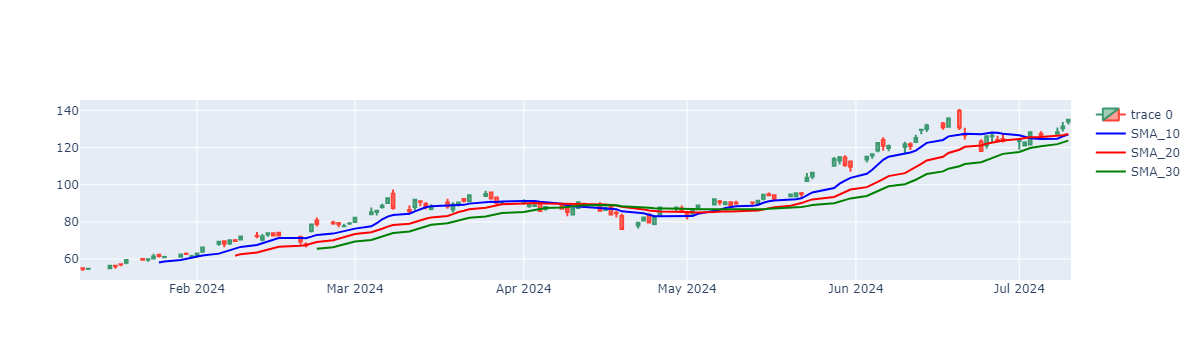

In [59]:
dfplt = datos[:]

figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],
                                        high=datos["High"],
                                        low=datos["Low"],
                                        close=datos["Close"])])

#agregar SMA de 10, 20 y 30 periodos al gráfico

figura.add_scatter(x=dfplt.index, y=dfplt["SMA_10"], mode='lines', line=dict(color='blue'), name='SMA_10')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_20"], mode='lines', line=dict(color='red'), name='SMA_20')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_30"], mode='lines', line=dict(color='green'), name='SMA_30')

figura.update_layout(xaxis_rangeslider_visible=False)
figura.show()



In [62]:
def get_data(symbol: str):
    datos = yf.download(tickers=symbol, period='6mo', interval='1d')
  
    return datos
# Get the data
datos = get_data('NVDA')

datos.ta.vwap(append=True)

[*********************100%%**********************]  1 of 1 completed


Date
2024-01-11     54.576000
2024-01-12     54.670001
2024-01-16     56.039000
2024-01-17     55.754668
2024-01-18     56.937998
                 ...    
2024-07-03    125.973333
2024-07-05    126.786669
2024-07-08    128.670001
2024-07-09    131.283335
2024-07-10    134.143336
Name: VWAP_D, Length: 124, dtype: float64

In [63]:
datos ['categorias']= revisar_velas(datos, 5, 'VWAP_D')

In [67]:
datos[datos['categorias'] !='Neutro']

,Open,High,Low,Close,Adj Close,Volume,VWAP_D,categorias
Date,,,,,,,,
2024-01-11,54.999001,55.346001,53.560001,54.821999,54.814926,596759000,54.576000,0
2024-01-12,54.619999,54.970001,54.330002,54.709999,54.702938,352994000,54.670001,0
2024-01-16,55.018002,56.834999,54.900002,56.382000,56.374725,449580000,56.039000,0
2024-01-17,56.347000,56.471001,54.740002,56.053001,56.045769,474394000,55.754668,0
2024-01-18,57.259998,57.599998,56.106998,57.106998,57.099628,491650000,56.937998,0
2024-01-19,57.988998,59.500000,57.224998,59.491001,59.483322,543501000,58.738667,Alcista
2024-01-22,60.049000,60.331001,59.070000,59.653999,59.646301,452955000,59.685000,Alcista
2024-02-07,68.319000,70.220001,67.599998,70.098999,70.089951,495575000,69.306333,Alcista
2024-02-08,70.073997,70.793999,69.455002,69.640999,69.632011,414422000,69.963333,Alcista


In [87]:
import yfinance as yf
import pandas_ta as ta

# Esta función descarga los datos del símbolo proporcionado
def get_data(symbol: str):
    datos = yf.download(tickers=symbol, period='6mo', interval='1d')
    return datos

# Obtiene los datos
datos = get_data('NVDA')

# Calcula el VWAP y lo añade al DataFrame 'datos'
datos.ta.vwap(append=True)

# Calcula la SMA de 20 períodos y la añade al DataFrame 'datos'
datos['SMA_20'] = datos.ta.sma(close='Close', length=20, append=True)

# Define la función para revisar las tendencias de las velas
def revisar_velas(datos, backcanles, ma_column):
    categorias = [0 for _ in range(backcanles)]
    for i in range(backcanles, len(datos)):
        if all(datos['Close'][i-backcanles:i] > datos[ma_column][i-backcanles:i]):
            categorias.append('Alcista')
        elif all(datos['Close'][i-backcanles:i] < datos[ma_column][i-backcanles:i]):
            categorias.append('Bajista')
        else:
            categorias.append('Neutro')
    return categorias

# Aplica la función 'revisar_velas' al DataFrame 'datos'
datos['tendencia_velas'] = revisar_velas(datos, 3, 'SMA_20')

[*********************100%%**********************]  1 of 1 completed


In [88]:
#calcular ADX
datos.ta.adx(append=True)
datos.ta.dm(append=True)

,DMP_14,DMN_14
Date,,
2024-01-11,NaN,NaN
2024-01-12,NaN,NaN
2024-01-16,NaN,NaN
2024-01-17,NaN,NaN
2024-01-18,NaN,NaN
...,...,...
2024-07-03,1.698323,0.848238
2024-07-05,1.617718,0.787641
2024-07-08,1.639312,0.731374


In [89]:
datos[30:70] 

,Open,High,Low,Close,Adj Close,Volume,VWAP_D,SMA_20,tendencia_velas,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,,,
2024-02-26,79.699997,80.646004,78.504997,79.092003,79.081802,503973000,79.414335,70.114951,Neutro,50.664144,1.545497,0.528301
2024-02-27,79.380997,79.480003,77.162003,78.700996,78.690842,391705000,78.447667,70.926750,Alcista,49.742867,1.422767,0.592997
2024-02-28,77.620003,78.932999,77.125000,77.663002,77.652977,393110000,77.907000,71.671201,Alcista,48.910734,1.310678,0.549194
2024-02-29,79.094002,79.989998,78.349998,79.112000,79.101791,507289000,79.150665,72.550451,Alcista,48.425395,1.290838,0.506243
2024-03-01,80.000000,82.300003,79.434998,82.278999,82.268379,479135000,81.338000,73.513050,Alcista,48.492174,1.370008,0.466918
2024-03-04,84.129997,87.695000,83.719002,85.237000,85.225998,615616000,85.550334,74.466900,Alcista,49.442412,1.680729,0.430873
2024-03-05,85.269997,86.097000,83.417000,85.963997,85.956940,520639000,85.159332,75.298500,Alcista,50.130127,1.551725,0.420981
2024-03-06,88.022003,89.723999,87.029999,88.699997,88.692711,582520000,88.484665,76.322350,Alcista,51.231907,1.710169,0.388840
2024-03-07,90.157997,92.766998,89.601997,92.668999,92.661385,608119000,91.679331,77.450850,Alcista,52.558862,1.811430,0.359298


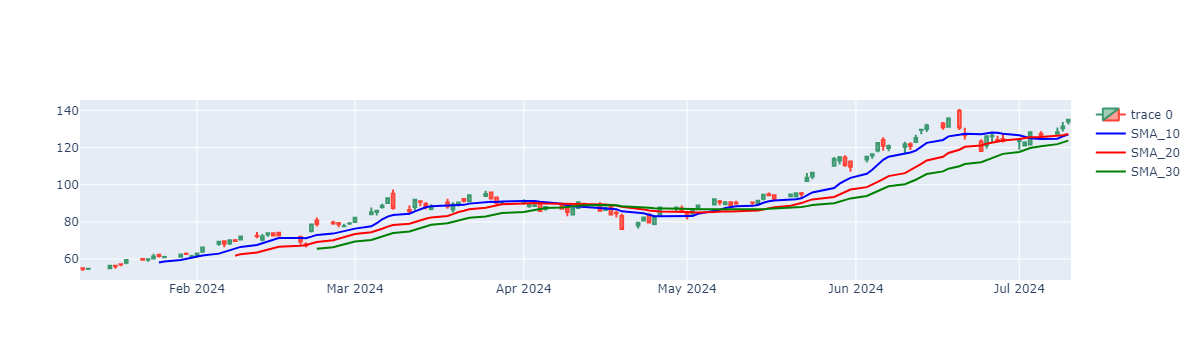

In [90]:
import pandas_ta as ta

# Calcula las medias móviles simples y las añade al DataFrame 'datos'
datos['SMA_10'] = datos.ta.sma(close='Close', length=10)
datos['SMA_20'] = datos.ta.sma(close='Close', length=20)
datos['SMA_30'] = datos.ta.sma(close='Close', length=30)

# Ahora puedes intentar graficar nuevamente
import plotly.graph_objects as go

dfplt = datos[:]

figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],
                                        high=datos["High"],
                                        low=datos["Low"],
                                        close=datos["Close"])])
# Agrega las medias móviles al gráfico
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_10"], mode='lines', line=dict(color='blue'), name='SMA_10')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_20"], mode='lines', line=dict(color='red'), name='SMA_20')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_30"], mode='lines', line=dict(color='green'), name='SMA_30')

figura.update_layout(xaxis_rangeslider_visible=False)
figura.show()

In [91]:
# funcion para se;al de tendencia con ADX
def senal_tendencia(datos, threshold = 40):
    tendencias = []
    for i in range(len(datos)):
        if datos['ADX'][i] > threshold :
            if datos['DMP'][i] > datos['DMN'][i]:
                tendencias.append('Alcista')
            else:
                tendencias.append('Bajista')
        else:
            tendencias.append('Neutro')

    return tendencias
    

In [92]:
print(datos.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP_D',
       'SMA_20', 'tendencia_velas', 'ADX_14', 'DMP_14', 'DMN_14', 'SMA_10',
       'SMA_30'],
      dtype='object')


In [93]:
# Calcula el indicador ADX y lo añade al DataFrame 'datos'.
datos.ta.adx(append=True)

# Renombra las columnas si es necesario, como lo estabas haciendo.
datos = datos.rename(columns=lambda x: x[:-3] if x.startswith('ADX') else x)
datos = datos.rename(columns=lambda x: x[:-3] if x.startswith('DM') else x)

# Ahora puedes llamar a tu función 'senal_tendencia' sin obtener el KeyError.
datos['tendencia_adx'] = senal_tendencia(datos)

C:\Users\andre\AppData\Local\Temp\ipykernel_20108\4034873442.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\andre\AppData\Local\Temp\ipykernel_20108\4034873442.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [94]:
datos[datos['tendencia_adx'] != 'Neutro']


,Open,High,Low,Close,Adj Close,Volume,VWAP_D,SMA_20,tendencia_velas,ADX,DMP,DMN,SMA_10,SMA_30,tendencia_adx
Date,,,,,,,,,,,,,,,
2024-02-21,68.005997,68.888000,66.248001,67.472000,67.463295,690298000,67.536001,67.493100,Alcista,52.250001,29.615368,26.410721,71.234400,NaN,Alcista
2024-02-22,75.025002,78.574997,74.220001,78.538002,78.527870,865100000,77.111000,68.351900,Neutro,51.048505,45.586176,19.091774,72.078300,NaN,Alcista
2024-02-23,80.790001,82.393997,77.570000,78.817001,78.806831,829388000,79.593666,69.211900,Neutro,50.842944,49.440588,16.900398,72.995901,65.510300,Alcista
2024-02-26,79.699997,80.646004,78.504997,79.092003,79.081802,503973000,79.414335,70.114951,Neutro,50.664144,46.869278,16.021441,73.691801,66.319300,Alcista
2024-02-27,79.380997,79.480003,77.162003,78.700996,78.690842,391705000,78.447667,70.926750,Alcista,49.742867,44.189667,18.417874,74.337100,67.119000,Alcista
2024-02-28,77.620003,78.932999,77.125000,77.663002,77.652977,393110000,77.907000,71.671201,Alcista,48.910734,42.164772,17.667696,74.890601,67.828367,Alcista
2024-02-29,79.094002,79.989998,78.349998,79.112000,79.101791,507289000,79.150665,72.550451,Alcista,48.425395,42.359374,16.612578,75.411800,68.597000,Alcista
2024-03-01,80.000000,82.300003,79.434998,82.278999,82.268379,479135000,81.338000,73.513050,Alcista,48.492174,44.796744,15.267360,76.373901,69.436067,Alcista
2024-03-04,84.129997,87.695000,83.719002,85.237000,85.225998,615616000,85.550334,74.466900,Alcista,49.442412,51.869764,13.297361,77.636301,70.294267,Alcista


In [96]:
# Aplica una función a cada fila del DataFrame 'datos'.
# La función compara los valores en las columnas 'tendencia_velas' y 'tendencia_adx'.
# Si los valores son iguales, asigna el valor de 'tendencia_velas' a la nueva columna 'confirmacion_senal'.
# Si los valores son diferentes, asigna 'Neutro' a 'confirmacion_senal'.
datos['confirmacion_senal'] = datos.apply(lambda row: row['tendencia_velas'] if row['tendencia_velas'] == row['tendencia_adx'] else 'Neutro', axis=1)

In [98]:
datos[(datos['confirmacion_senal'] != datos['Neutro']

,Open,High,Low,Close,Adj Close,Volume,VWAP_D,SMA_20,tendencia_velas,ADX,DMP,DMN,SMA_10,SMA_30,tendencia_adx,confirmacion_senal
Date,,,,,,,,,,,,,,,,
2024-02-21,68.005997,68.888000,66.248001,67.472000,67.463295,690298000,67.536001,67.493100,Alcista,52.250001,29.615368,26.410721,71.234400,NaN,Alcista,Alcista
2024-02-27,79.380997,79.480003,77.162003,78.700996,78.690842,391705000,78.447667,70.926750,Alcista,49.742867,44.189667,18.417874,74.337100,67.119000,Alcista,Alcista
2024-02-28,77.620003,78.932999,77.125000,77.663002,77.652977,393110000,77.907000,71.671201,Alcista,48.910734,42.164772,17.667696,74.890601,67.828367,Alcista,Alcista
2024-02-29,79.094002,79.989998,78.349998,79.112000,79.101791,507289000,79.150665,72.550451,Alcista,48.425395,42.359374,16.612578,75.411800,68.597000,Alcista,Alcista
2024-03-01,80.000000,82.300003,79.434998,82.278999,82.268379,479135000,81.338000,73.513050,Alcista,48.492174,44.796744,15.267360,76.373901,69.436067,Alcista,Alcista
2024-03-04,84.129997,87.695000,83.719002,85.237000,85.225998,615616000,85.550334,74.466900,Alcista,49.442412,51.869764,13.297361,77.636301,70.294267,Alcista,Alcista
2024-03-05,85.269997,86.097000,83.417000,85.963997,85.956940,520639000,85.159332,75.298500,Alcista,50.130127,48.532609,13.166845,79.287500,71.171267,Alcista,Alcista
2024-03-06,88.022003,89.723999,87.029999,88.699997,88.692711,582520000,88.484665,76.322350,Alcista,51.231907,52.778994,12.000323,81.410300,72.132167,Alcista,Alcista
2024-03-07,90.157997,92.766998,89.601997,92.668999,92.661385,608119000,91.679331,77.450850,Alcista,52.558862,54.841012,10.877734,82.823399,73.175733,Alcista,Alcista


In [100]:
datos[(datos['tendencia_velas'] != datos['tendencia_adx']) & (datos['confirmacion_senal'] != 'Neutro')]

,Open,High,Low,Close,Adj Close,Volume,VWAP_D,SMA_20,tendencia_velas,ADX,DMP,DMN,SMA_10,SMA_30,tendencia_adx,confirmacion_senal
Date,,,,,,,,,,,,,,,,


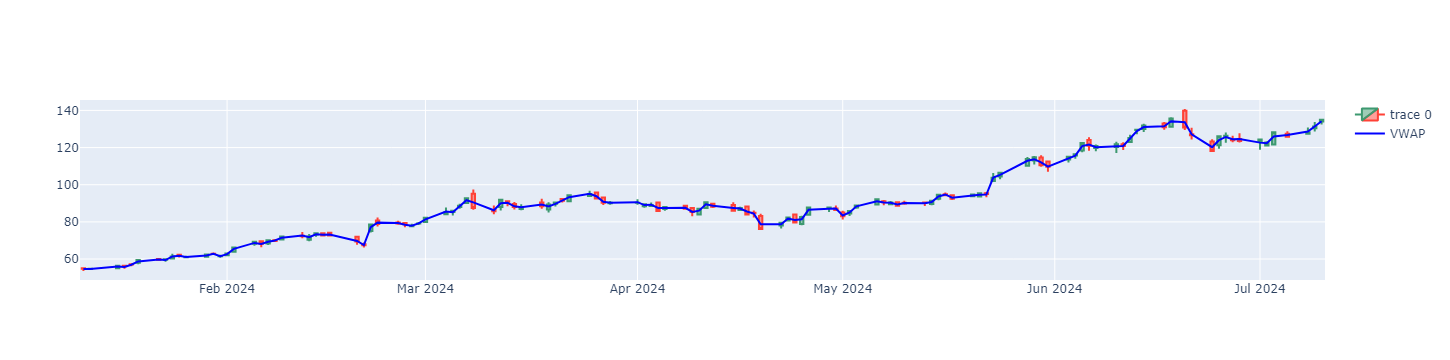

In [102]:
import plotly.graph_objects as go

dfplt = datos[:]

figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=dfplt["Open"],
                                        high=dfplt["High"],
                                        low=dfplt["Low"],
                                        close=dfplt["Close"])])

figura.add_trace(go.Scatter(x=dfplt.index, y = dfplt['VWAP_D'], mode = 'lines', name = 'VWAP', line=dict(color='blue')))

figura.update_layout(xaxis_rangeslider_visible=False)
figura.show()